# playwithdata
Thye purpose of this file is to show off some of the basic data and stats that the other files will be working with. It's not a testbed as much as it is a simple demonstration of what the data looks like and how some of the more basic functions work (like calculating individual player stats). The actual functions appear in `baseballstats.py`, imported in the next cell as "baseballstats".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import baseballstats as bbs

In [2]:
players = pd.read_csv("baseballdatabank-2022.2/core/People.csv")
players['playerID'] = players['playerID']


In [3]:
players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [4]:
for i, col in enumerate(players.columns):
    print(col, players.dtypes[i])

playerID object
birthYear float64
birthMonth float64
birthDay float64
birthCountry object
birthState object
birthCity object
deathYear float64
deathMonth float64
deathDay float64
deathCountry object
deathState object
deathCity object
nameFirst object
nameLast object
nameGiven object
weight float64
height float64
bats object
throws object
debut object
finalGame object
retroID object
bbrefID object


The first function that was created called `verify_player`. It's task was to simply make sure any given `playerID` was in fact in the database. If not, then it would return that it wasn't. This was largely to clarify any possible `KeyError`s that may spring up later and also served as a simple introduction to handling the data. Here, we simply checked it against the first 10 players in the database:

In [5]:
for player in players['playerID'].head(10):
    print(player)
    try:
        bbs.verify_player(player)
        print("worked!")
    except:
        print("nope :-(")

aardsda01
worked!
aaronha01
worked!
aaronto01
worked!
aasedo01
worked!
abadan01
worked!
abadfe01
worked!
abadijo01
worked!
abbated01
worked!
abbeybe01
worked!
abbeych01
worked!


## `baseballstats.py` functions tests:

The next set of functions just calculate some basic stats by digging through the database and combining the appropriate totals. It includes basic stats like batting average (AVG). It also includes helper functions for counting that can either be called in this notebook or within other functions in `baseballstats`. Batting/fielding stats will be tested on Barry Bonds (`playerID = bondsba01`) for consistency and Tom Seaver (`playerID = seaveto01`) for pitching. If you don't know what the stat represents, `baseballstats.py` constains more helpful documentation.

The numbers produced from Bonds and Seaver were verified by online searches on both Baseball-Reference and Fangraphs.

In [98]:
bbs.verify_batter('bondsba01') #makes sure he's in the database
print(f"Barry Bonds' career regular season batting average was{bbs.AVG('bondsba01'):.3f}")
print(f"His career regular season on-base percentage was{bbs.OBP('bondsba01'): .3f}")
print(f"His career regular season slugging percentage was{bbs.SLG('bondsba01'): .3f}")
print(f"His career regular season OPS+ was {bbs.OPSplus('bondsba01'): .3f}")
print(f"His career regular season wOBA was {bbs.wOBA('bondsba01'): .3f}")
print(f"He won {bbs.award_count('bondsba01')} awards and {bbs.award_count('bondsba01', 'Gold Glove')} Gold Gloves")
print(f"Meanwhile, Derek Jeter has {bbs.WS_titles('jeterde01')} World Series titles while Bonds has {bbs.WS_titles('bondsba01')}")
print(f"Bonds was inducted into the Hall {bbs.HoF_inductee('bondsba01')} times")
print(f"His appearances at every position: {bbs.count_appearances('bondsba01')}")
print(f"He played in {bbs.count_seasons('bondsba01')} seasons")

Barry Bonds' career regular season batting average was0.298
His career regular season on-base percentage was 0.444
His career regular season slugging percentage was 0.607
His career regular season OPS+ was  181.860
His career regular season wOBA was  0.476
He won 47 awards and 8 Gold Gloves
Meanwhile, Derek Jeter has 5 World Series titles while Bonds has 0
Bonds was inducted into the Hall 0 times
His appearances at every position: G_p        0.0
G_c        0.0
G_1b       0.0
G_2b       0.0
G_3b       0.0
G_ss       0.0
G_of    2874.0
G_dh      39.0
G_ph     104.0
G_pr       4.0
dtype: float64
He played in 22 seasons


In [99]:
bbs.verify_pitcher('seaveto01')
print(f"Tom Seaver's career regular season ERA was{bbs.ERA('seaveto01'): .2f}")
print(f"His career WHIP was{bbs.WHIP('seaveto01'): .2f}")
print(f"He struck out {int(bbs.count_pitching_stat('seaveto01', 'SO'))} batters over his career")
print(f"His career regular season ERA+ was {bbs.ERAplus('seaveto01'): .3f}")
print(f"His career regular season FIP was {bbs.FIP('seaveto01'): .3f}")
print(f"He won the World Series {bbs.WS_titles('seaveto01')} times")
print(f"Seaver was inducted into the Hall {bbs.HoF_inductee('seaveto01')} times")
print(f"He played in {bbs.count_seasons('seaveto01')} seasons")

Tom Seaver's career regular season ERA was 2.86
His career WHIP was 1.12
He struck out 3640 batters over his career
His career regular season ERA+ was  129.283
His career regular season FIP was  3.288
He won the World Series 1 times
Seaver was inducted into the Hall 1 times
He played in 20 seasons


## Some Visualization:

Some visualization of the numbers of the final csvs created from those functions:

In [35]:
batting = pd.read_csv("battingdata.csv")
pitching = pd.read_csv("pitchingdata.csv")
del batting['Unnamed: 0'] #leftover column from outputting to csv earlier
del pitching['Unnamed: 0']

In [36]:
batting = batting.set_index('playerID')
batting

,Seasons,Last_season,HoF,Awards,WS_titles,allstars,appearances,G,R,H,HR,RBI,SB,BB,AVG,OBP,SLG,OPS+,wOBA
playerID,,,,,,,,,,,,,,,,,,,
washiro01,10,1989,0,0,0,0,649,564,190,414,20,146,28,65,0.261034,0.288928,0.261034,84.421422,0.294842
plummbi01,10,1978,0,0,0,0,378,367,72,168,14,82,4,95,0.188341,0.265144,0.188341,58.815285,0.260767
wilsore01,10,1960,0,0,0,0,621,602,206,455,24,189,25,215,0.257790,0.332842,0.257790,93.507962,0.393599
stanlmi02,15,2000,0,2,0,1,1644,1467,625,1138,187,702,13,652,0.269541,0.368411,0.269541,124.535429,0.467597
gallemi01,13,1997,0,0,1,0,1272,1111,374,700,42,282,24,326,0.238826,0.313110,0.238826,78.272300,0.299397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gainede01,10,1922,0,0,2,0,555,548,218,438,14,185,54,149,0.272388,0.330260,0.272388,117.064828,0.371242
paglimi01,11,1995,0,0,1,0,1334,1246,462,942,134,505,18,343,0.241477,0.304378,0.241477,97.421317,0.381531
broutda01,19,1904,1,0,1,0,1678,1676,1529,2303,107,1301,257,840,0.342403,0.422312,0.342403,180.483052,0.442783


In [37]:
pitching = pitching.set_index('playerID')
pitching

,Seasons,Last_season,HoF,Awards,WS_titles,allstars,appearances,SO,W,L,G,SV,H,ER,HR,BB,ERA,WHIP,ERA+,FIP
playerID,,,,,,,,,,,,,,,,,,,,
cunnibe01,12,1901,0,0,0,0,361,718,142,167,342,2,3071,1283,62,1064,4.222452,1.512067,93.131575,4.445026
hamiljo02,10,2003,0,0,0,0,243,894,74,73,242,1,1408,662,130,493,4.444058,1.417951,101.192624,4.590800
rueteki01,13,2005,0,0,0,0,349,818,130,92,340,0,2092,911,220,582,4.274765,1.394161,104.201846,4.833244
ewingbo01,11,1912,0,0,0,0,309,998,124,118,291,4,2097,637,31,614,2.491525,1.178183,114.016583,2.553095
merriji01,11,1975,0,1,0,1,298,932,81,86,297,7,1468,602,160,322,3.653405,1.207013,96.446440,3.369398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rhemfl01,12,1936,0,0,2,0,294,534,105,97,294,10,1958,805,113,529,4.199189,1.441461,100.300224,4.923931
wrighcl01,10,1975,0,0,0,1,360,667,100,111,329,3,1679,672,143,550,3.498650,1.289433,100.775011,3.817810
schumha02,13,1946,0,1,1,2,448,906,158,121,391,7,2424,926,139,902,3.357325,1.339868,117.856447,4.018870


In [38]:
print(f"Out of {batting.shape[0]} eligible batters, only {batting['HoF'].sum(axis=0)} made it into the Hall")
print(f"Out of {pitching.shape[0]} eligible pitchers, only {pitching['HoF'].sum(axis=0)} made it into the Hall")

Out of 1743 eligible batters, only 151 made it into the Hall
Out of 991 eligible pitchers, only 63 made it into the Hall


That's actually higher than I would've expected. My guess is the official rules, particularly the 10 year rule, were great at chopping down a larger portion of the players than I would've guessed. Not many players make it for at least 10 seasons before retiring or otherwise being unable to play. That works out nicely for me because it means the models take much less time to train

<AxesSubplot:title={'center':'Top 10 Batters with the Most Hits'}, xlabel='playerID', ylabel='# of Hits'>

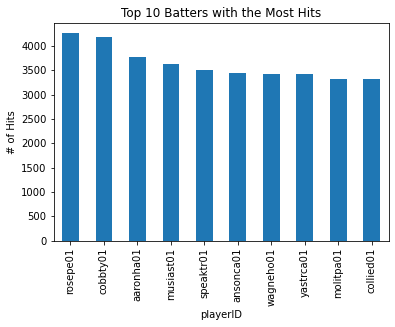

In [96]:
batting['H'].sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Batters with the Most Hits', ylabel='# of Hits')

<AxesSubplot:title={'center':'Top 10 Pitchers with the Most Strikeouts'}, xlabel='playerID', ylabel='# of Strikeouts'>

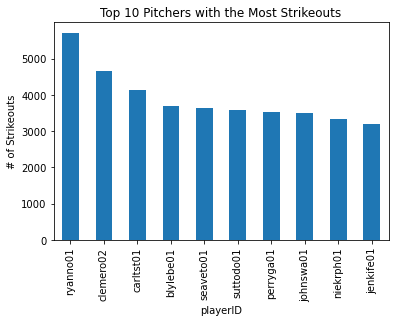

In [41]:
pitching['SO'].sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Pitchers with the Most Strikeouts', ylabel='# of Strikeouts')

Text(3600, 40, 'Ty Cobb')

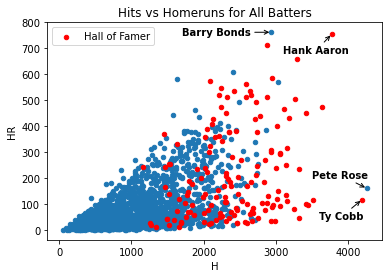

In [97]:
fig, ax = plt.subplots()
batting.loc[batting['HoF']==0].plot(x = 'H', y='HR', kind='scatter', title='Hits vs Homeruns for All Batters', ax=ax)
batting.loc[batting['HoF']==1].plot(x = 'H', y='HR', kind='scatter', ax=ax, c='r', label='Hall of Famer')
ax.legend()
ax.annotate('Barry Bonds', xytext=(1700,750), xy=(2935, 762), arrowprops=dict(arrowstyle="->"), weight='bold')
ax.annotate('Pete Rose', xytext=(3500,200), xy=(4256, 160), arrowprops=dict(arrowstyle="->"), weight='bold')
ax.annotate('Hank Aaron', xytext=(3100,680), xy=(3771, 755), arrowprops=dict(arrowstyle="->"), weight='bold')
ax.annotate('Ty Cobb', xytext=(3600,40), xy=(4189, 117), arrowprops=dict(arrowstyle="->"), weight='bold')

In [92]:
print(batting.loc['bondsba01', ['H', 'HR']])
print(batting.loc['rosepe01', ['H', 'HR']])
print(batting.loc['aaronha01', ['H', 'HR']])
print(batting.loc['cobbty01', ['H', 'HR']])

H     2935.0
HR     762.0
Name: bondsba01, dtype: float64
H     4256.0
HR     160.0
Name: rosepe01, dtype: float64
H     3771.0
HR     755.0
Name: aaronha01, dtype: float64
H     4189.0
HR     117.0
Name: cobbty01, dtype: float64


Text(4000, 1200, 'Roger Clemens')

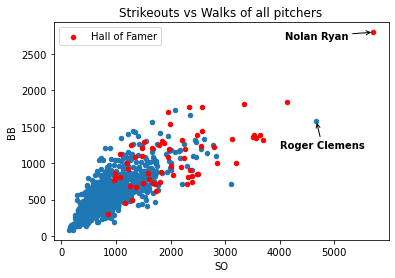

In [90]:
fig, ax = plt.subplots()
pitching.loc[pitching['HoF']==0].plot(x='SO', y='BB', kind='scatter', title="Strikeouts vs Walks of all pitchers", ax=ax)
pitching.loc[pitching['HoF']==1].plot(x='SO', y='BB', kind='scatter', title="Strikeouts vs Walks of all pitchers", ax=ax, c='r', label="Hall of Famer")
ax.legend()
ax.annotate('Nolan Ryan', xytext=(4100,2700), xy=(5714, 2795), arrowprops=dict(arrowstyle="->"), weight='bold')
ax.annotate('Roger Clemens', xytext=(4000,1200), xy=(4672, 1580), arrowprops=dict(arrowstyle="->"), weight='bold')

In [87]:
print(pitching.loc['ryanno01', ['SO', 'BB']]) #Just to show that that arrow is in fact pointing at Nolan Ryan
print(pitching.loc['clemero02', ['SO', 'BB']])

SO    5714.0
BB    2795.0
Name: ryanno01, dtype: float64
SO    4672.0
BB    1580.0
Name: clemero02, dtype: float64


Already these plots show how there is a good but far from perfect correlation between some stats and hall of fame canidacy.